# Investments with big returns
### - Hassan B.
___

## Contents



## 1. Purpose
Our stakeholder, Mr. Charles C. is interested in investing in properties for the purpose of selling them at higher profits. However, he is not sure whether he should buy new or old houses. Or if he should consider renovating the building before he sells them. Or if he should wait for some years before selling them, perhaps the prices may go higher in near future. In this analysis, we have come up with some hypothesis to assist Mr Charles. They are mentioned below:

1. It would be in his best interest to renovate properties which have never been renevoated.
2. We will divide the houses built in 3 categories: a. Older than 1950s, b. Between 1951 to 1999, and c. Above 2000s


![Kingscounty](https://www.kingcounty.gov/~/media/depts/assessor/images/2015/assessors_social.ashx?la=en)

## 2. Importing Modules

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

#%pip install folium
import folium
from folium import plugins
from folium.plugins import HeatMap

# for the regression model
import statsmodels.api as sms
import statsmodels.formula.api as smf


%matplotlib inline


## 3. Reading the data and Filtering important data

In [46]:
# Reading the data
df = pd.read_csv('data/King_County_House_prices_dataset.csv',  na_values='?',parse_dates =["date"])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Look at data types
print(df.info())
(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Somethings we have learned from the data are:
- The max room are 33 which my stakeholder will not be interested in since his budget is not so high. We are aiming for rooms from 1-5 only and 1-3 bathrooms.
- Condition is ranging from 1 - 5 scale
- View ranges from 0 - 4 scale
- Grade from scale 3 - 13
- Houses are built from 1900 - 2015 with mean around 1970. So it seems that the older houses are more. 

#### - IMPORTANT! : conversion of the values in columns

In [47]:
# Converting 0 to Null value
#df[df.eq(0)] = np.nan
df = df.replace(np.nan, 0, regex=True)
# Removing null values
df.isnull().any();

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df.bathrooms = df.bathrooms.round()

df.head()

# Converting float/object to int for "ZA BAFROOMS"
#df.bathrooms.astype(int);
#df.bedrooms.astype(int);
#df1.sqft_basement.astype(str).astype(float)
#pd.to_numeric(df['sqft_basement'], downcast='integer')
#df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [48]:
# Filtering unnecessary columns for simplicity - DATA FILTERING
df1 = df.drop(['lat','long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'view', 'date', 'id', 'sqft_basement'],axis=1)


## 4. Analyzing the data

### 4.1 Sneak peak using Seaborn and Folium

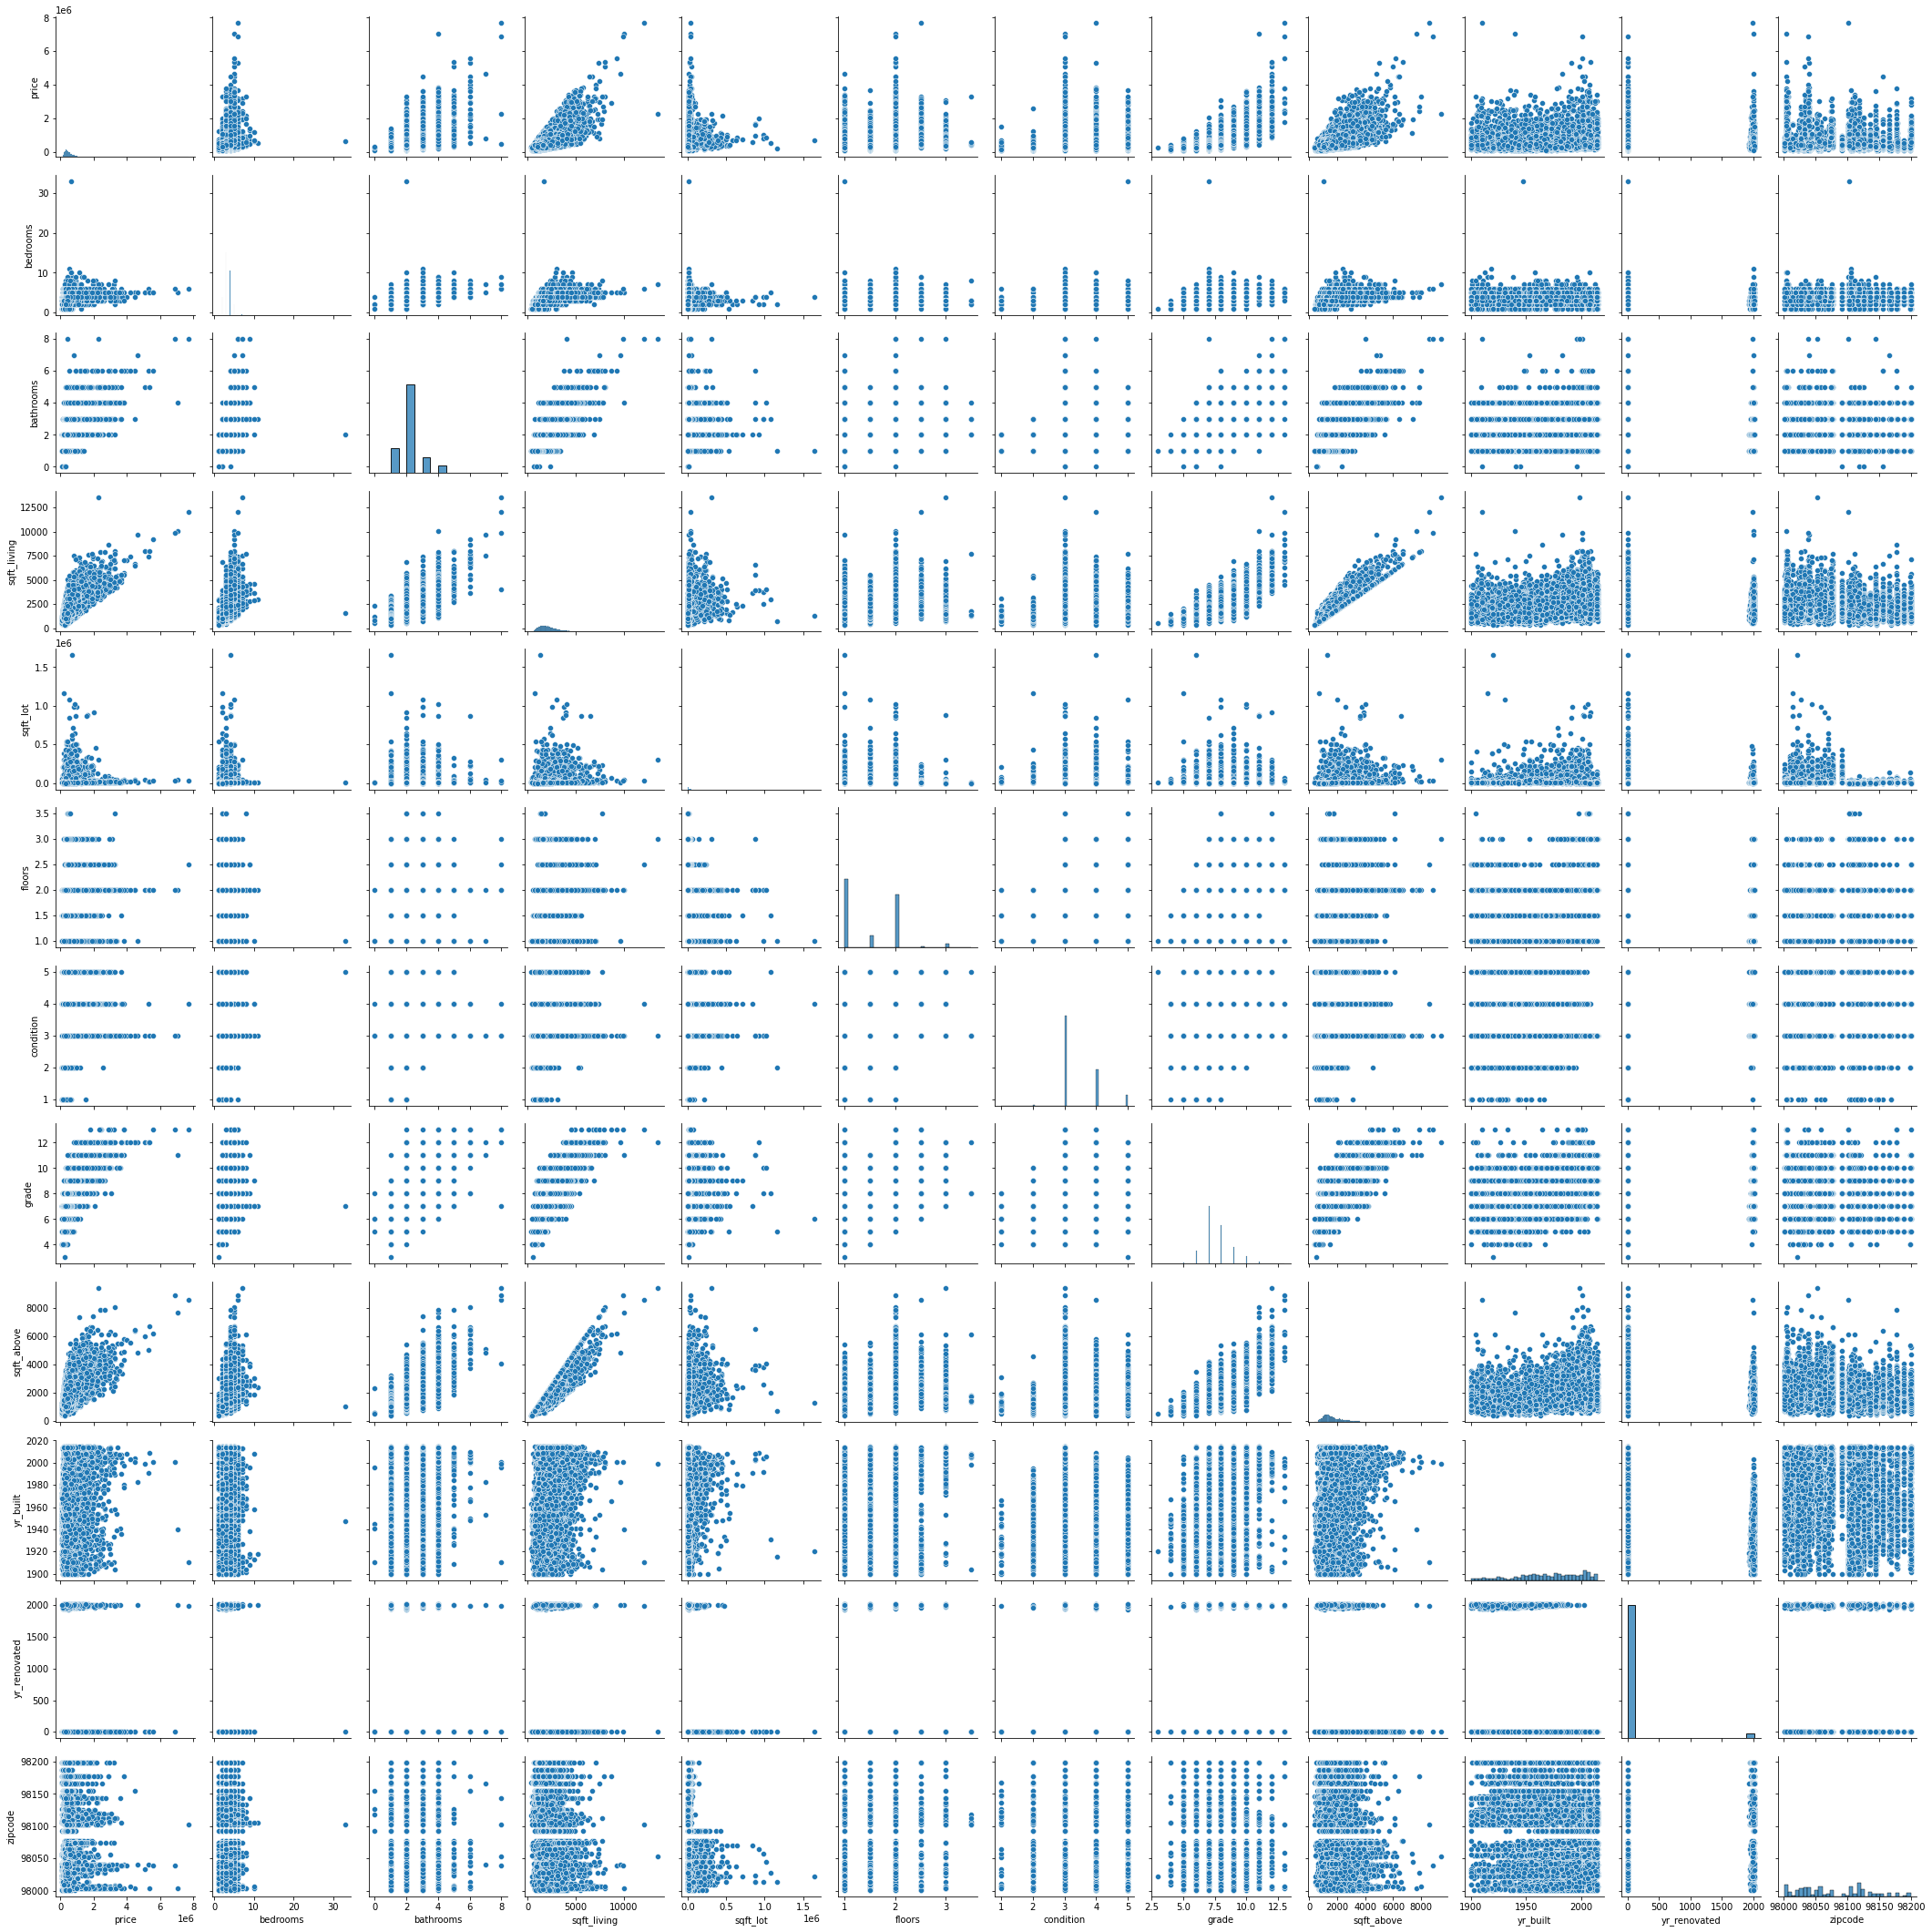

In [6]:
# Sneak peak
sns.pairplot(df1, palette='tab20')
plt.savefig("pairplot_1.png", dpi=300)

/Users/hsb/neuefische/EDA_Project_Hassan/.venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hsb/neuefische/EDA_Project_Hassan/.venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hsb/neuefische/EDA_Project_Hassan/.venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hsb/neuefische/EDA_Project_Hassan/.venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hsb/neuefische/EDA_Project_Hassan/.venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg

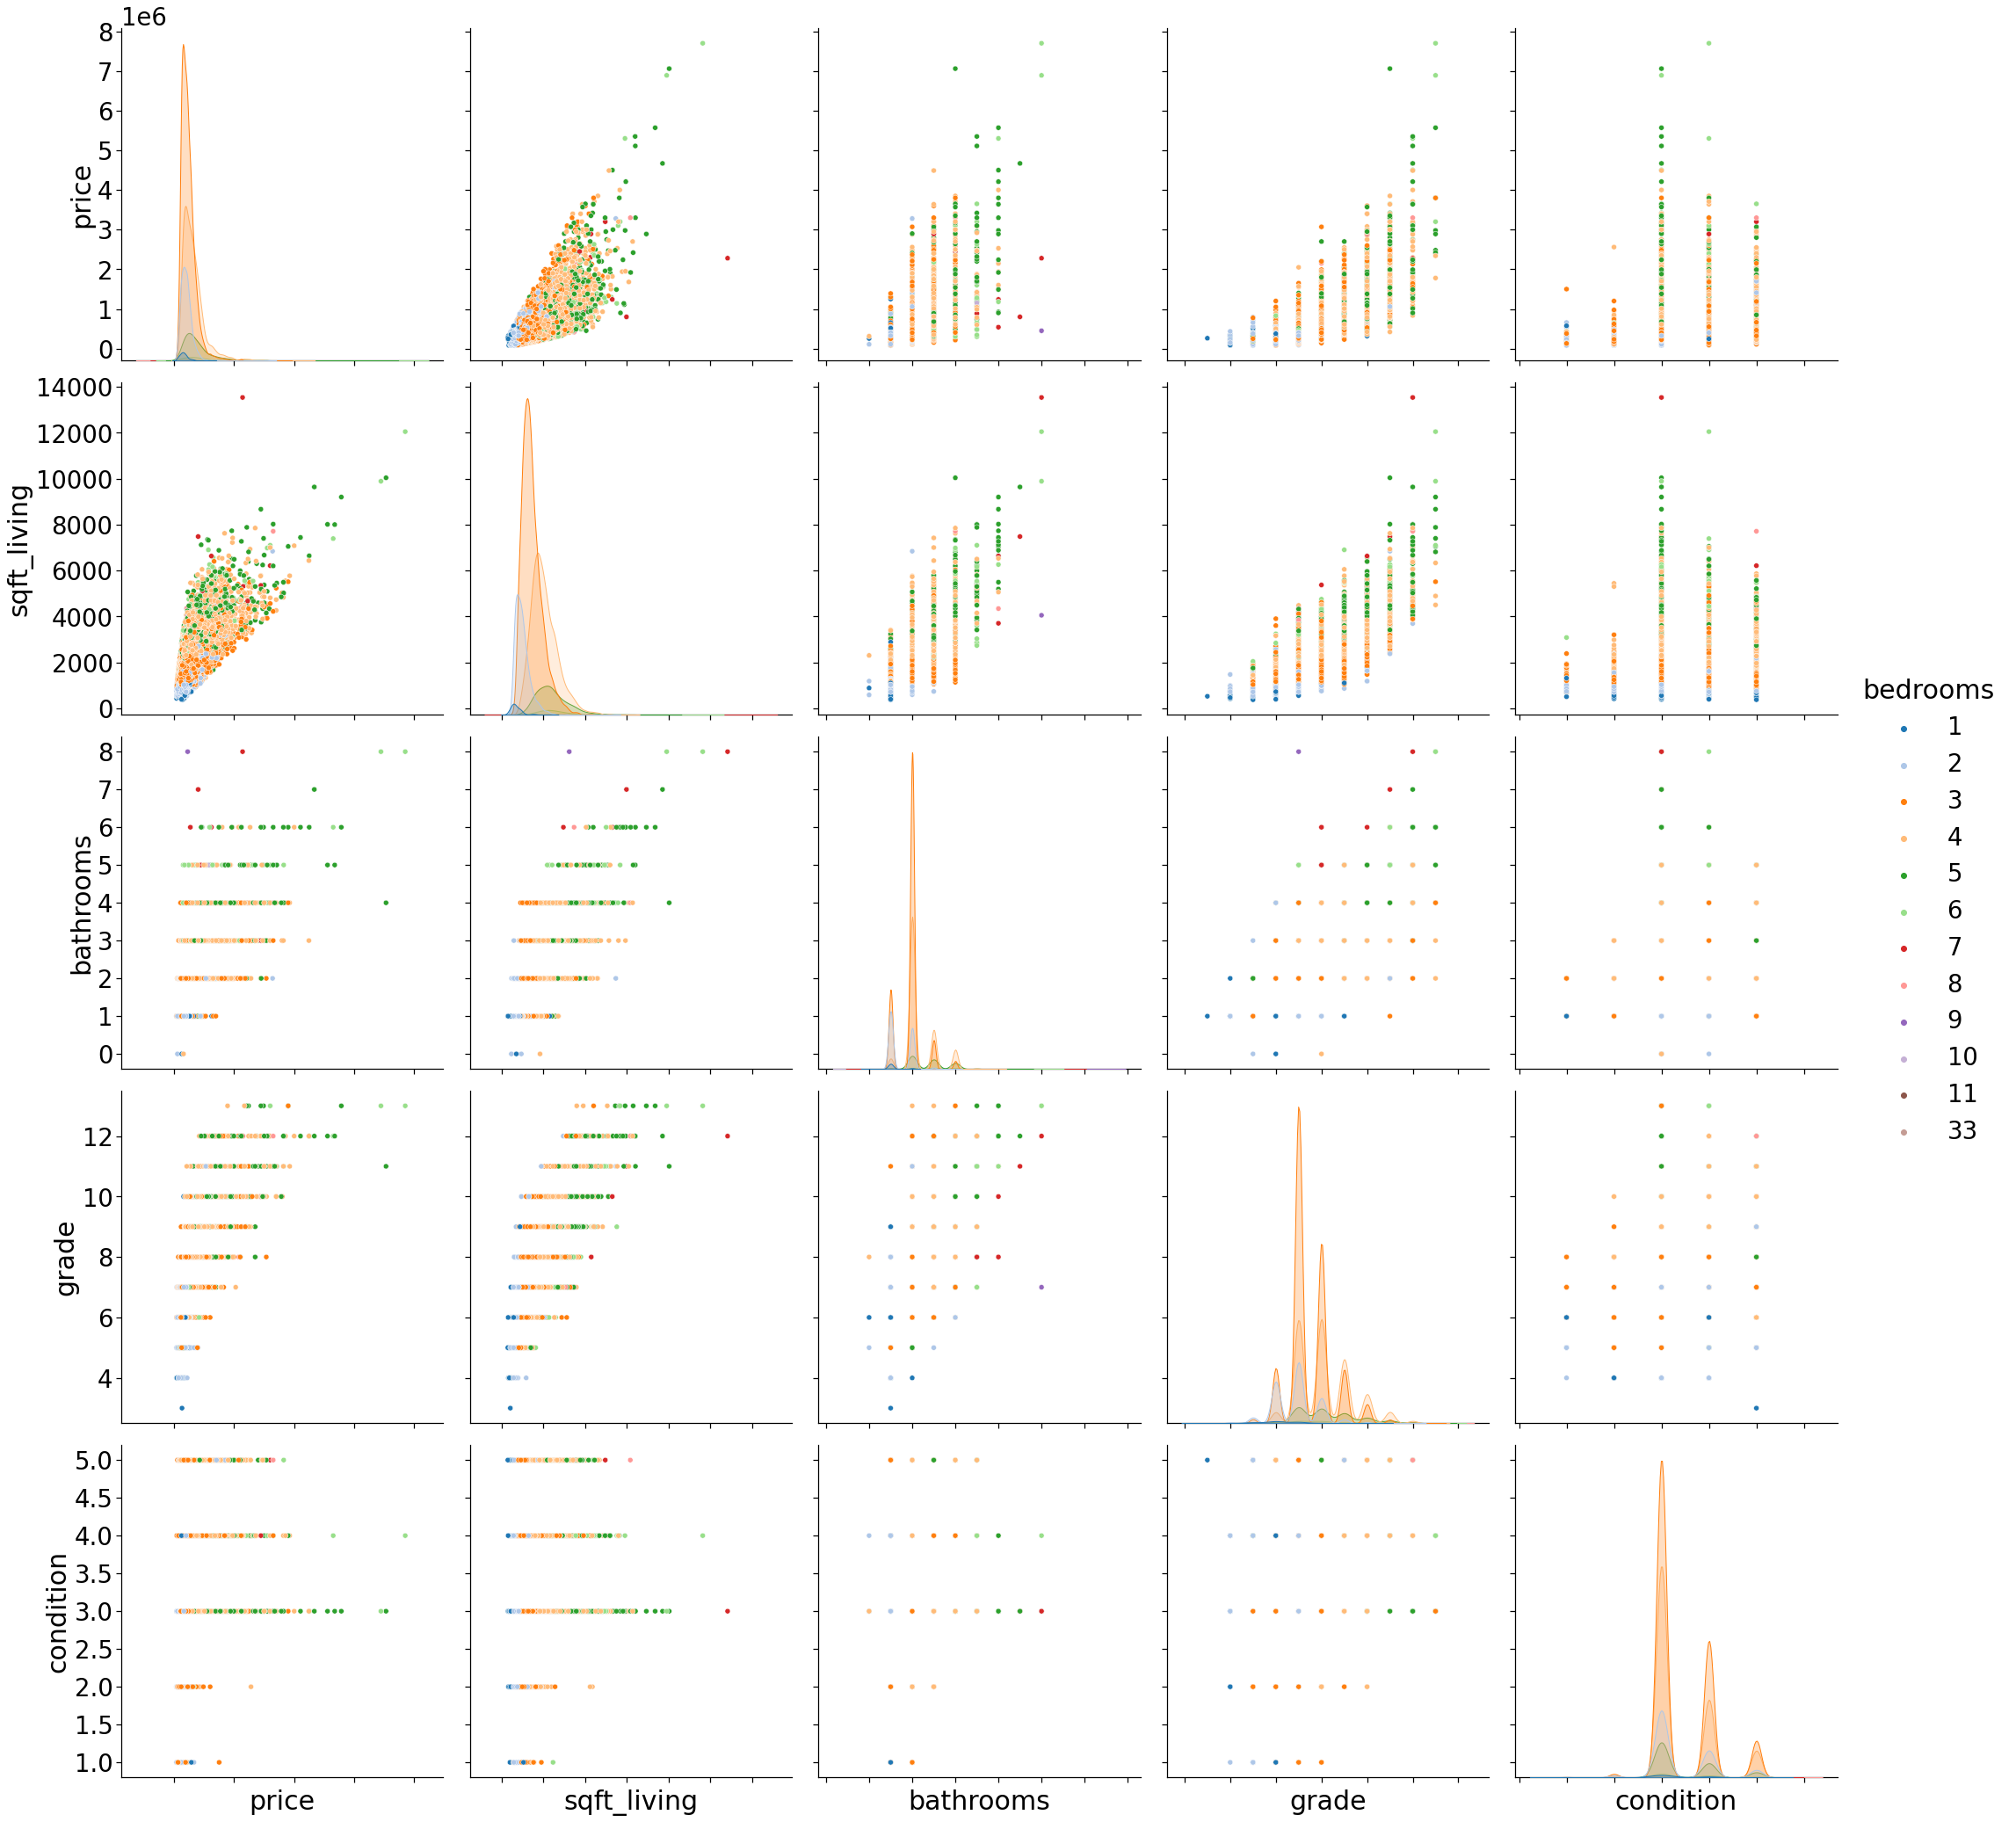

In [7]:
# Redoing pairplot with bedrooms as Hue
with sns.plotting_context("notebook",font_scale=2.5):

    g = sns.pairplot(df[['price','sqft_living','bedrooms', 'bathrooms', 'grade', 'condition']], 
                 hue='bedrooms', palette='tab20',height=6)
g.set(xticklabels=[]);
plt.savefig("pairplot_2.png", dpi=300)

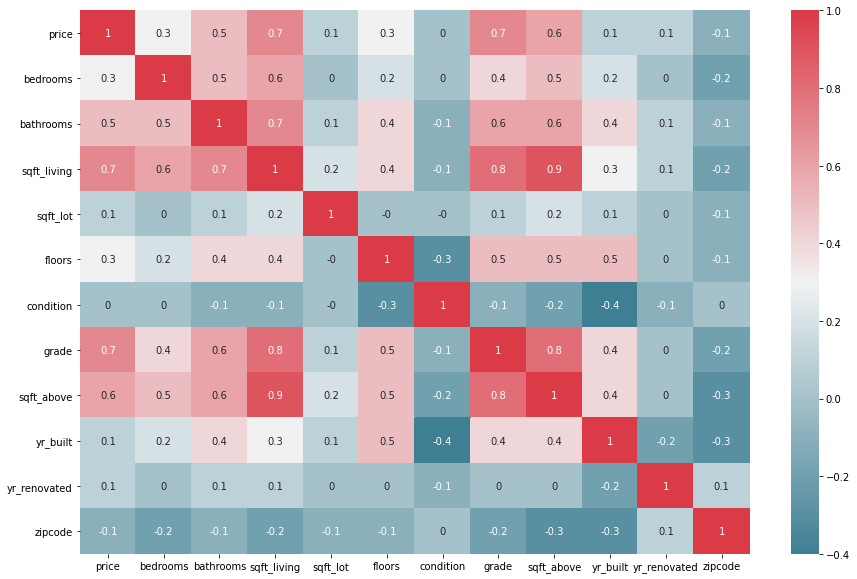

In [8]:
def correlation_heatmap(df1):
    fig, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(df1.corr().round(1), annot=True, cmap = colormap)

correlation_heatmap(df1) 
plt.savefig("corr_heatmap.png", dpi=300)

#### Remember Mr. Charles is purely interested in higher returns. The correlation with responsible variable i.e., the price and the explanatory variables are short listed below:

- sqft_living
- grade (higher grade houses for cheaper prices)
- sqft_above
- condition (better condition houses for cheaper prices)

### 4.2 Heatmapping and zipcode finder

In [9]:
# Familiarize with zip codes using HeatMap from Folium

#Initialize maps
mp = folium.Map([47.560093, -122.213982], zoom_start=10)

# # Make the list of Lat an Lng
lat = df.lat.tolist()
lng = df.long.tolist()

# mark each station as a point
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=0.05,
                        popup=row['zipcode'],
                        fill_color="#3db7e4" # divvy color
                       ).add_to(mp)
    
# # convert to (n, 2) nd-array format for heatmap
Arr_station = list(zip(lat, lng))

# # # plot heatmap
mp.add_child(plugins.HeatMap(Arr_station, radius=0.1))
HeatMap(Arr_station).add_to(mp)
mp
mp.save('map1.html')


### 4.3 Basic plots with closer view

In [10]:
# I would like to have total number of rooms
df1['rooms'] = df1.bathrooms + df1.bedrooms
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,rooms
0,221900.0,3,1.0,1180,5650,1.0,3,7,1180,1955,0.0,98178,4.0
1,538000.0,3,2.0,2570,7242,2.0,3,7,2170,1951,1991.0,98125,5.0
2,180000.0,2,1.0,770,10000,1.0,3,6,770,1933,0.0,98028,3.0
3,604000.0,4,3.0,1960,5000,1.0,5,7,1050,1965,0.0,98136,7.0
4,510000.0,3,2.0,1680,8080,1.0,3,8,1680,1987,0.0,98074,5.0


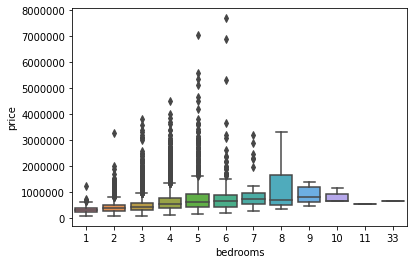

In [11]:
# Box plots to have a look at outliers
sns.boxplot(x="bedrooms", y='price', data=df1)

plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['figure.figsize'] = 10,6
plt.savefig("boxplot_1.png", dpi=300)

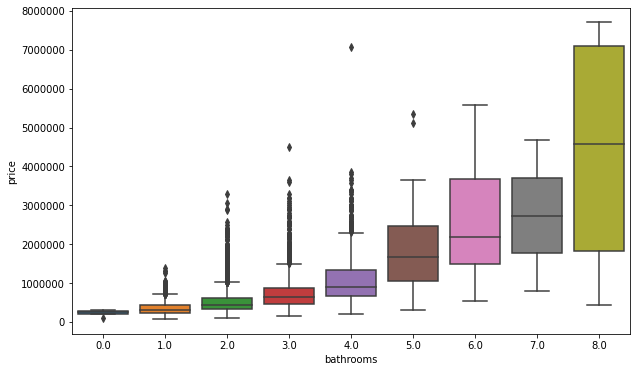

In [12]:
sns.boxplot(data=df1, x="bathrooms", y="price")

plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['figure.figsize'] = 10,6
plt.savefig("boxplot_3.png", dpi=300)

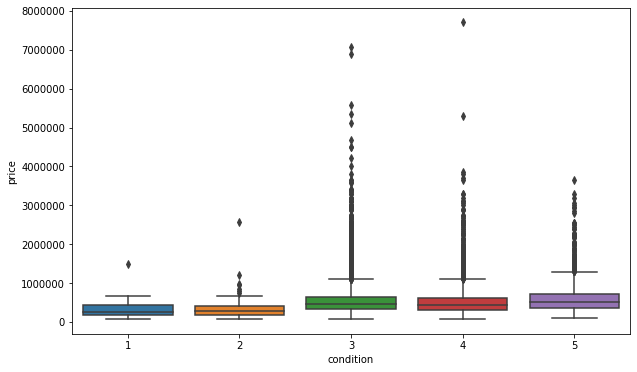

In [13]:
sns.boxplot(x="condition", y='price', data=df1)

plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['figure.figsize'] = 8,8
plt.savefig("boxplot_2", dpi=300)

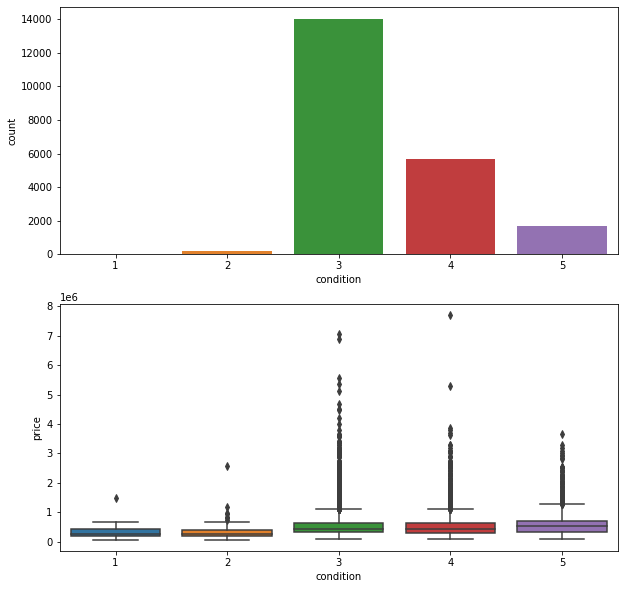

<Figure size 576x576 with 0 Axes>

In [14]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
sns.countplot(x='condition', data=df1, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=df1, ax=ax[1])
plt.show()
plt.savefig("boxplot_4.png", dpi=300)

Key takeaways from the boxplots:

- The houses with more number of bathrooms are higher but it kind of plateaus near 7-8 bathrooms
- The price of houses increases for houses with 0-2.5 (around 3) floors and then subsequently decreases
- Houses with more number of floors have higher price.
- Majority of houses of condition level between 3 and 5 have similiar prices

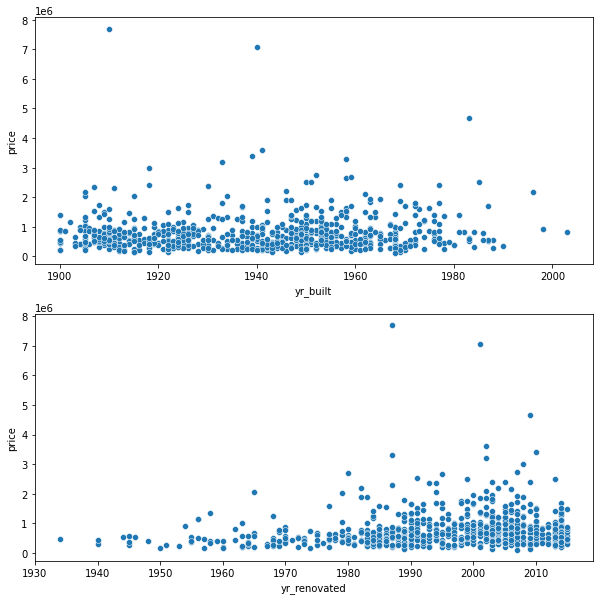

<Figure size 576x576 with 0 Axes>

In [15]:
df2= df1.query('yr_renovated > 0')
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
sns.scatterplot(x='yr_built', y='price', data=df2, ax=ax[0])
sns.scatterplot(x='yr_renovated', y= 'price',
            data=df2, ax=ax[1])

plt.show()
plt.savefig("year_scatter.png", dpi=300)

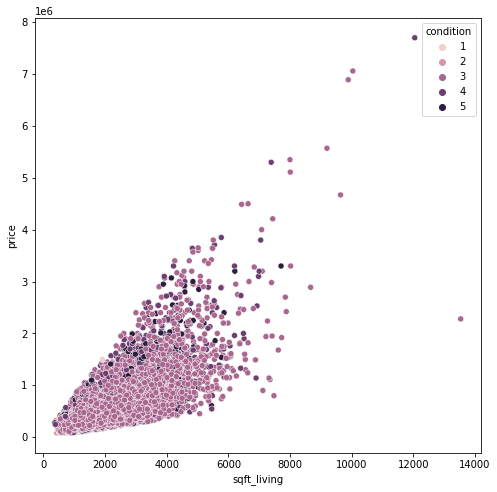

In [16]:
s = sns.scatterplot(x='sqft_living', y= 'price', hue='condition',data=df1)
plt.savefig("price_scatter.png", dpi=300)

In [17]:
bath = ['bathrooms', 'bedrooms']
a = sns.light_palette("green", as_cmap=True)
pd.crosstab(df1[bath[0]], df1[bath[1]]).style.background_gradient(cmap = a)
#plt.savefig("crosstab_1.png", dpi=300)

bedrooms,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,
0.0,1,2,0,1,0,0,0,0,0,0,0,0
1.0,167,1587,1800,327,43,6,1,0,0,0,0,0
2.0,28,1129,7186,4709,695,90,7,1,0,1,0,1
3.0,0,41,656,1219,506,88,7,6,2,1,1,0
4.0,0,1,182,601,321,72,17,4,3,0,0,0
5.0,0,0,0,19,22,12,2,1,0,1,0,0
6.0,0,0,0,6,13,2,2,1,0,0,0,0
7.0,0,0,0,0,1,0,1,0,0,0,0,0
8.0,0,0,0,0,0,2,1,0,1,0,0,0


In [18]:
bed_cond = ['bedrooms', 'condition']
b = sns.light_palette("green", as_cmap=True)
pd.crosstab(df1[bed_cond[0]], df1[bed_cond[1]]).style.background_gradient(cmap = b)
#plt.savefig("crosstab_2.png", dpi=300)

condition,1,2,3,4,5
bedrooms,,,,,
1,4,10,123,47,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2
9,0,0,6,0,0


Now, there are two options for us, we can either one variable to predict prices or we can use a combination of features to predict the target variable, which is the price of our houses in King county, USA. At first, we will choose one parameter and train our model based on that.

As mentioned before, in our dataset, price is the dependent or target variable which is the target of our model. Other variables than price will be independent variables which will help us determine the target variable. So we will first make a Simple linear regression model which will use the dependent variable and one independent variable to train and test our model.

## 5. Regression modelling

### 5.1 Simple regression line on sqftliving vs price

In [19]:
# Create an OLS model
X = df.sqft_living
y = df.price
X = sms.add_constant(X)

model = sms.OLS(y, X).fit()
# Our model needs an intercept so we add a column of 1s:

# return the output of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:04:50   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R2 with this model is 0.493

In [20]:
intercept, slope = model.params
intercept, slope

(-43988.892194227185, 280.8630143588747)

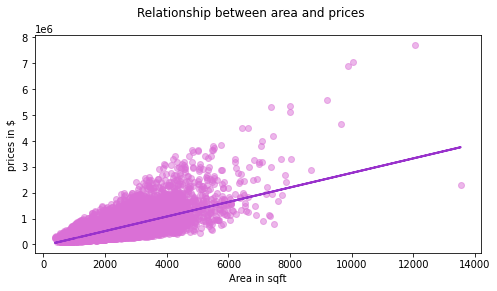

In [21]:
# Plotting the result of our model
fig, ax = plt.subplots(figsize=(8, 4))
x = df.sqft_living
# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between area and prices')
# plotting regression line
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("prices in $");
ax.set_xlabel("Area in sqft");

### 5.2 Linear regression line for every explanatory variables:
#### price, bedroom, bathrooms, sqft_living, floors, condition, grade, yr_built, yr_renovated


In [40]:
# list of all possible exlanatory variables
explanatory_vars = list(df1.columns)
explanatory_vars = [e for e in explanatory_vars 
                        if e not in ('price','zipcode')]
explanatory_vars;

In [41]:
# simple linear regression with each explanatory variable
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df1).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    
# sales predicting salesis included as explanatory variable for sanity check

R squared for each possible explanatory variable:
bedrooms 	 	= 0.0953
bathrooms 	 	= 0.27
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.0659
condition 	 	= 0.0013
grade   	 	= 0.446
sqft_above 	 	= 0.366
yr_built 	 	= 0.00291
yr_renovated 	 	= 0.0139


In [42]:
# use all explanatory variables
model = 'price ~ bedrooms + bathrooms + sqft_living + floors + condition + grade + yr_built + yr_renovated + sqft_lot + sqft_above'
smf.ols(formula=model, data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3531.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:36:50   Log-Likelihood:            -2.9693e+05
No. Observations:               21597   AIC:                         5.939e+05
Df Residuals:                   21586   BIC:                         5.940e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.492e+06   1.36e+05     47.731      0.000    6.23e+06    6.76e+06
bedrooms     -4.886e+04   2104.006    -23.221      0.000    -5.3e+04   -4.47e+04
bathrooms     5.035e+04   3070.238     16.399      0.000    4.43e+04    5.64e+04
sqft_living    200.3544      4.607     43.489      0.000     191.324     209.385
floors        3.346e+04   3790.859      8.827      0.000     2.6e+04    4.09e+04
condition     2.067e+04   2607.407      7.929      0.000    1.56e+04    2.58e+04
grade          1.32e+05   2251.955     58.629      0.000    1.28e+05    1.36e+05
yr_built     -3755.7136     69.785    -53.818      0.000   -3892.498   -3618.929
yr_renovated    23.7525      4.441      5.348      0.000      15.047      32.457
sqft_lot        -0.2338      0.038     -6.106      0.000      -0.309      -0.159
sqft_above     -19.3217      4.594     -4.206      0.000     -28.325     -10.318
==============================================================================
Omnibus:                    17301.994   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1218066.285
Skew:                           3.350   Prob(JB):                         0.00
Kurtosis:                      39.176   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Adding predicting price values 
X = df1[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'yr_built', 'yr_renovated', 'sqft_lot', 'sqft_above']]
y = df.price
X = sms.add_constant(X)
model = sms.OLS(y, X).fit()
# Our model needs an intercept so we add a column of 1s:

price_trend = model.predict(X).round(1)
df1['price_trend'] = price_trend
df1['returns'] = df1['price_trend'] - df1['price']

df1.returns = pd.to_numeric(df1.returns, errors='coerce')
df1 = df1.sort_values(['returns'])

In [63]:
#print(df1['bedrooms == 33'].sort_values(ascending=False))
df1.query('bedrooms == 33')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,price_trend,returns
15856,640000.0,33,2.0,1620,6000,1.0,5,7,1040,1947,0.0,98103,-967850.9,-1607850.9


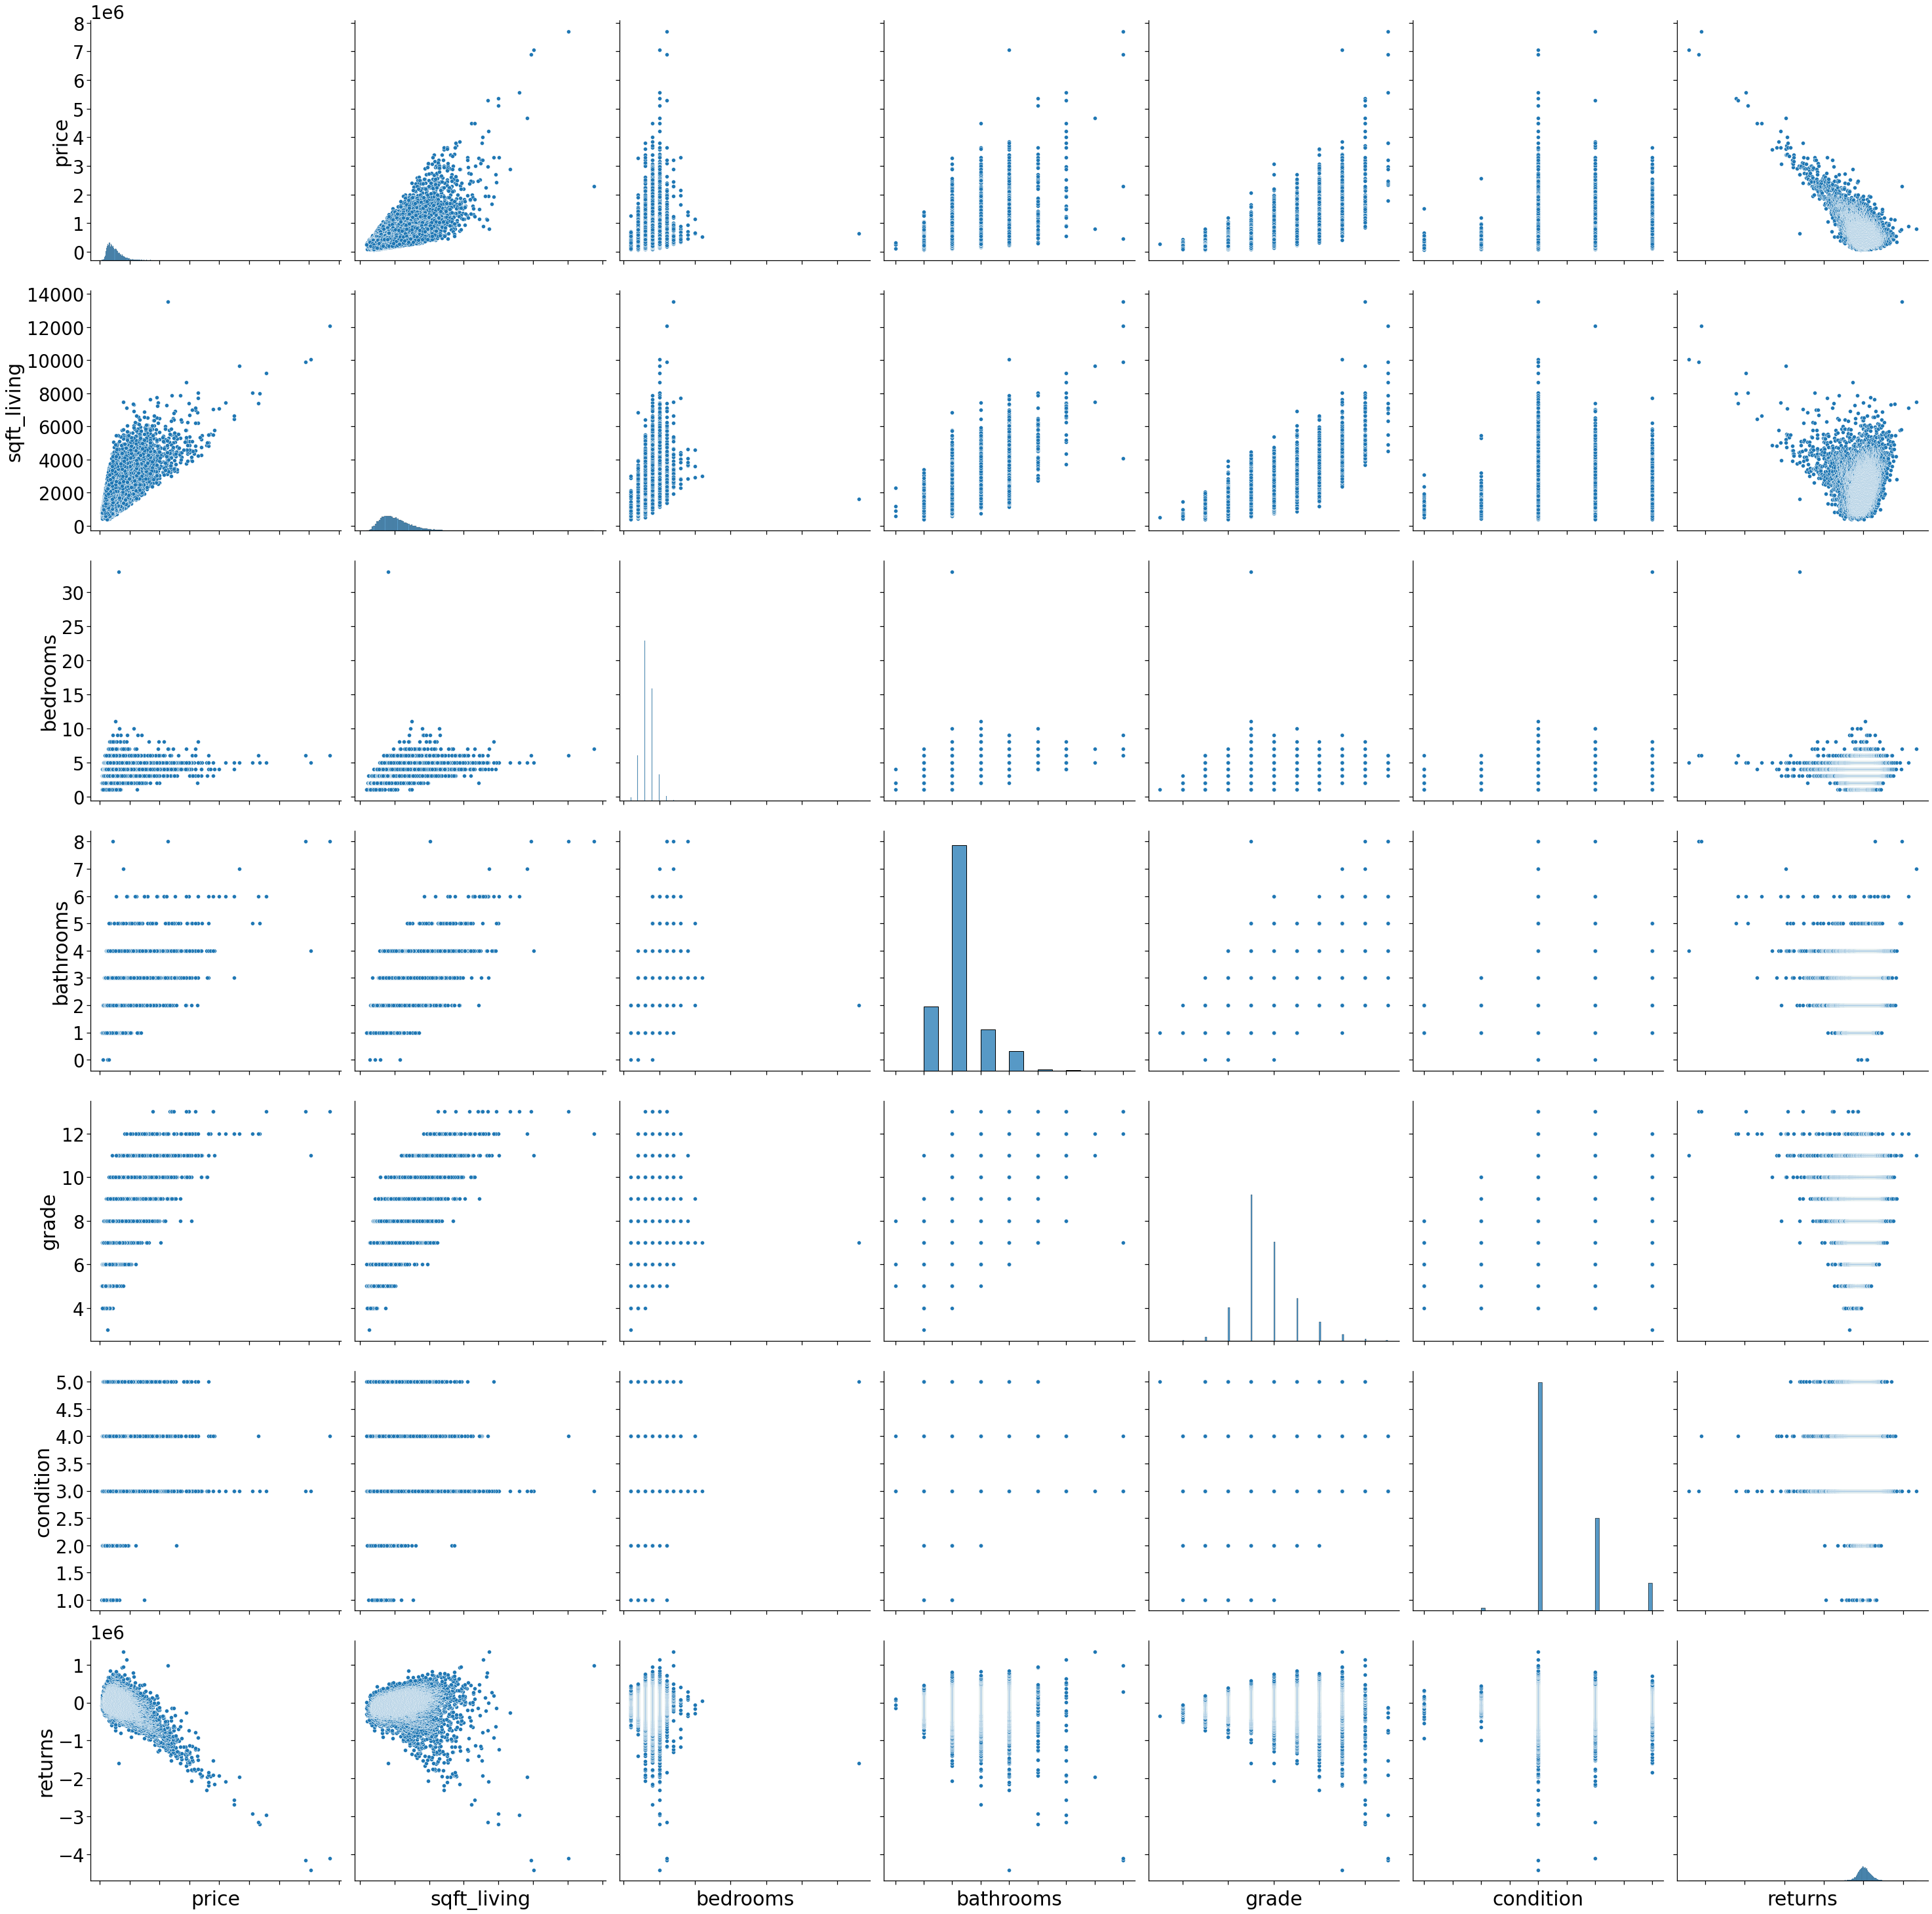

In [26]:
with sns.plotting_context("notebook",font_scale=2.5):

    g = sns.pairplot(df1[['price','sqft_living','bedrooms', 'bathrooms', 'grade', 'condition', 'returns']], 
                  palette='tab20',height=6)
g.set(xticklabels=[]);
plt.savefig("pairplot_returns.png", dpi=300)

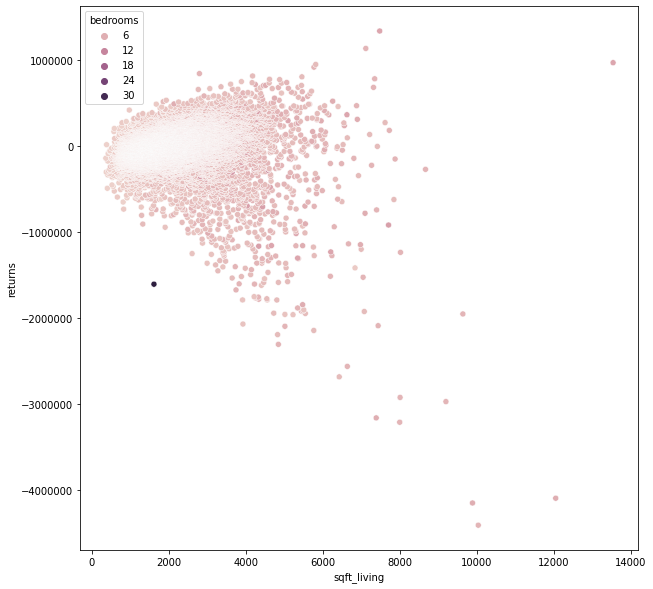

In [65]:
sns.scatterplot(x='sqft_living', y= 'returns', hue='bedrooms',data=df1)
plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['figure.figsize'] = 10,10
#plt.savefig("scatterplot_returns.png", dpi=300)

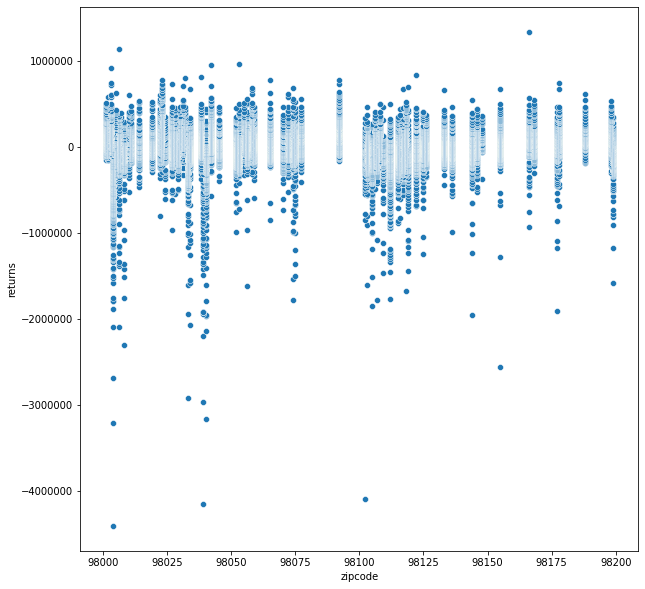

In [28]:
sns.scatterplot(x='zipcode', y= 'returns',data=df1)
plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['figure.figsize'] = 10,10
plt.savefig("scatterplot_returns_zip.png", dpi=300)

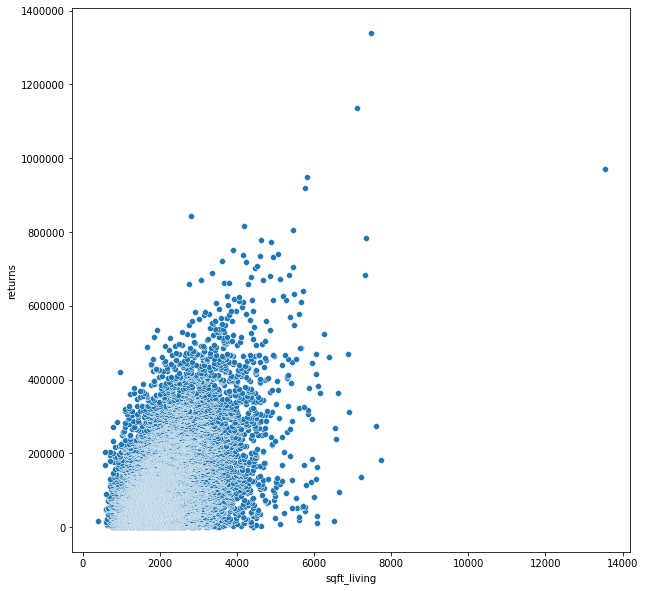

In [29]:
df2 = df1.query('returns > 0')
sns.scatterplot(x='sqft_living', y= 'returns',data=df2)
plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['figure.figsize'] = 10,10
plt.savefig("scatterplot_returns_2.png", dpi=300)

In [30]:
# Test with different Xs
rs = smf.ols(formula='price ~ sqft_living + sqft_above', data=df1).fit().rsquared
f'{rs:.3}'

'0.493'

## 6. Open Questions

- Impact of having basement on price. This can be done by categorizing the basement and no basement for same living area and compare it with price trend.

In [31]:
# Categorizing Year built in three columns
